# Exploratory Data Analysis of Retail Store

By: John Klenn Andrew P. Dungaran \
Date: April 2024

## Introduction

Task #3 from The Sparks Foundation - Graduate Rotational Internship Program, conducted in April 2024, involved Exploratory Data Analysis of a retail store based in the US.

## Step 0: Imports and Reading Data

Importing all the necessary tools that will be needed in the analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [3]:
# Read the Dataset
df_store = pd.read_csv('SampleSuperstore.csv')

## Step 1: Understanding the Data

What does this dataset contains?
* Dataframe `shape`
* `head` and `tail`
* `dtypes` or `info`
* `describe`

In [4]:
# Inspecting what the dataset contains
df_store.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [5]:
# Determining the number of rows and columns
dfshape = df_store.shape
print(f'Number of Rows: {dfshape[0]}')
print(f'Number of Columns: {dfshape[1]}')

Number of Rows: 9994
Number of Columns: 13


In [6]:
# Determining the datatypes of each column
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# Getting the statistical overview of the dataset
df_store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Step 2: Data Preperation

Clean the data!
* Dropping irrelevant columns and/or rows
* Identifying duplicates
* Renaming
* Feature creation

In [8]:
# Number of duplicates
df_store.duplicated().value_counts()

False    9977
True       17
Name: count, dtype: int64

We found out that there are `17` duplicates in the dataset.

Since there are no unique identifiers (such as codes or shipment dates) to distinguish between duplicate values, we will need to seek insights from other departments to further investigate these duplicates. 

However, for the purposes of our current analysis, we will proceed by removing these duplicate values from the dataset.

In [9]:
df_store = df_store.loc[~df_store.duplicated()].copy()
df_store

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Step 3: Feature Relationship

* Numerical and/or Categorical Analysis
* Plotting feature distributions
    * Histogram
    * Boxplot
    * Pie Chart
    * Barplot
    * Scatterplot
    * Heatmap Correlation
    * Pairplot

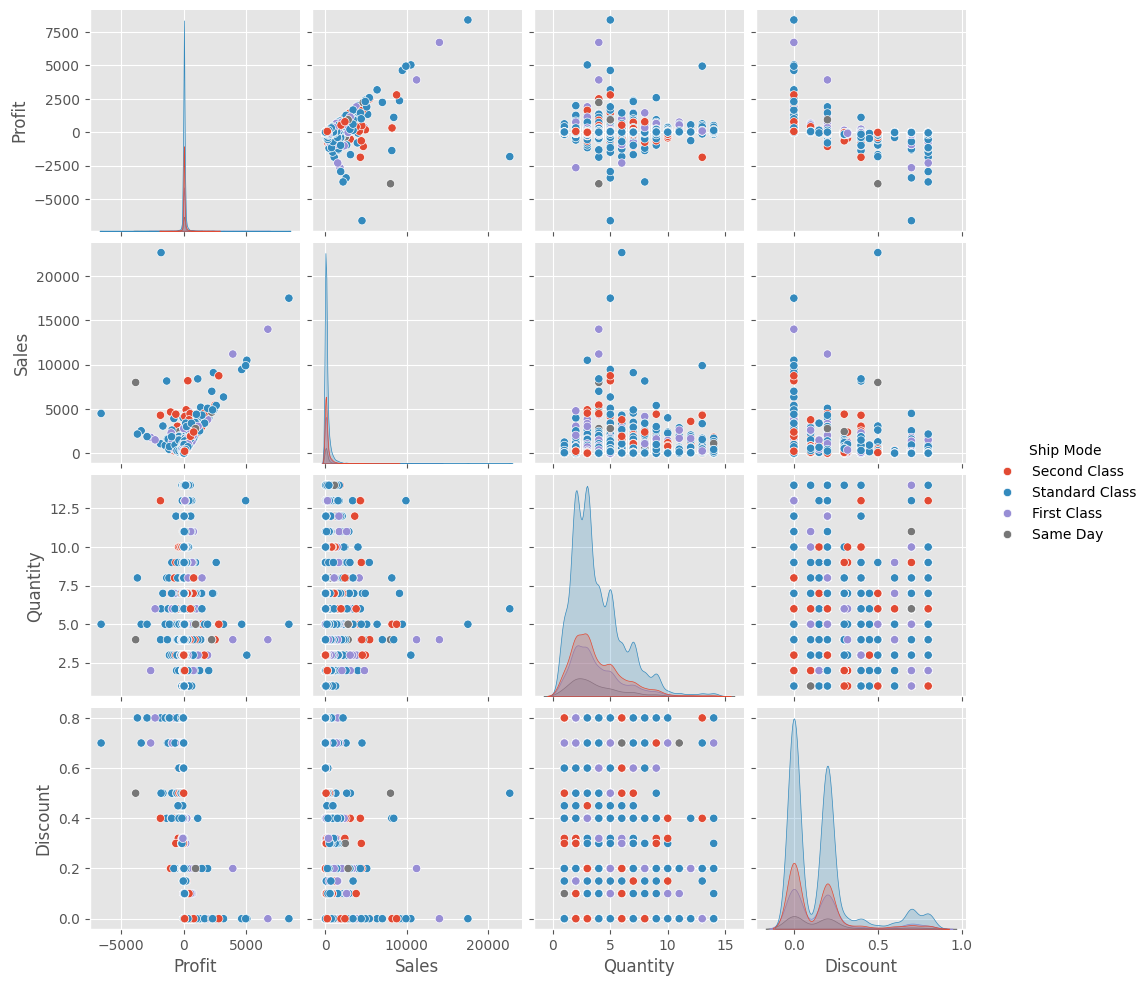

In [10]:
# PairPlot to get an overall view of what we're dealing with
sns.pairplot(df_store, vars=['Profit', 'Sales', 'Quantity', 'Discount'], hue='Ship Mode')
plt.show()

### Numerical Analysis

* Exploratory Analysis for those with `numeric` data types.

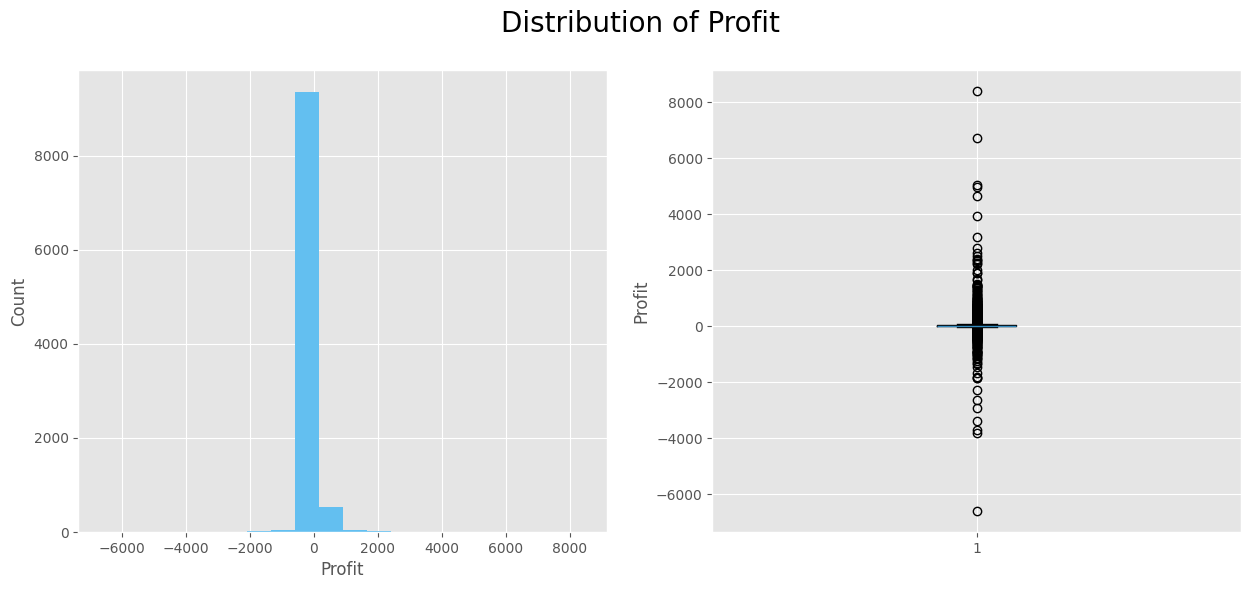

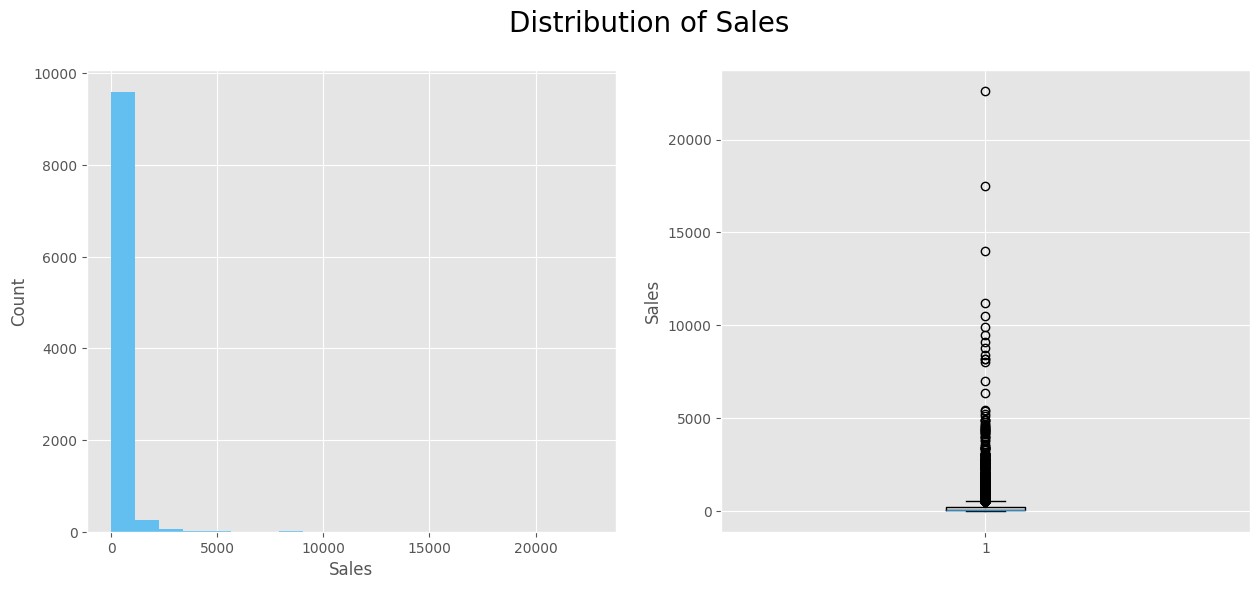

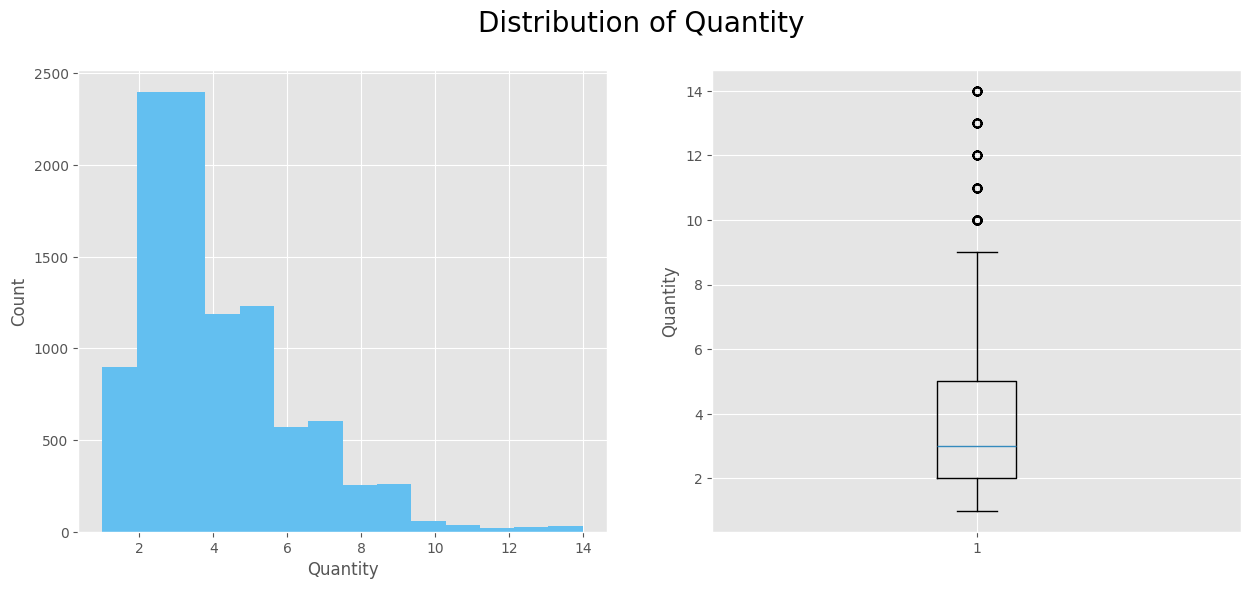

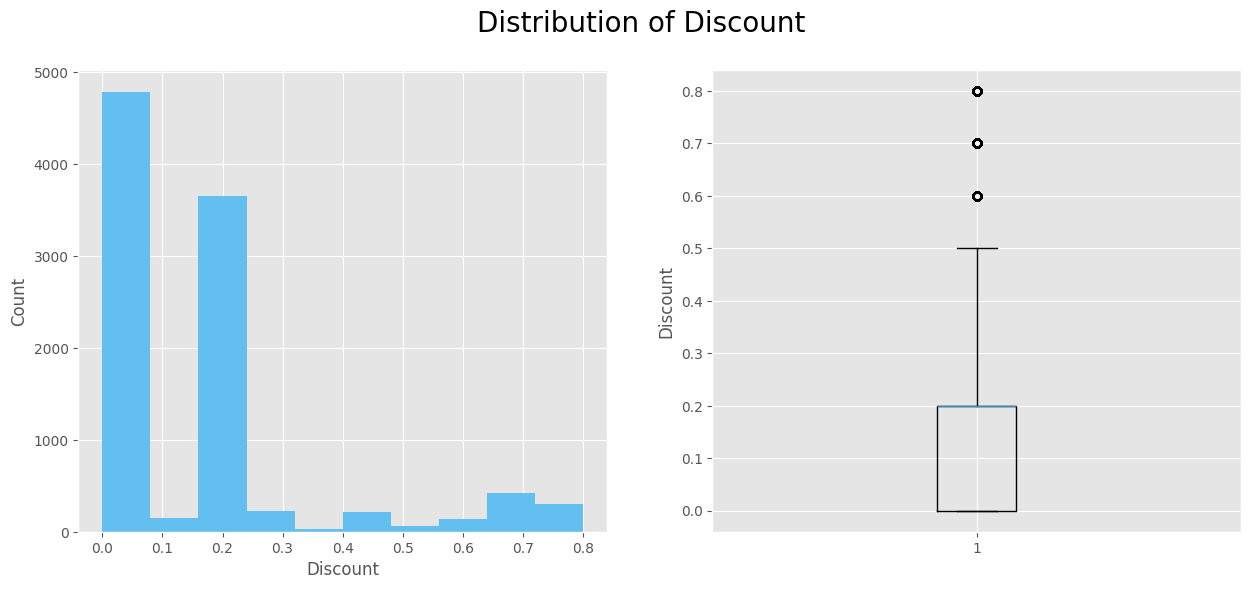

In [11]:
#Distribution of Profit
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1.hist(df_store['Profit'], bins=20, color='#63bff0')
ax1.set_ylabel('Count')
ax1.set_xlabel('Profit')

ax2.boxplot(df_store['Profit'])
ax2.set_ylabel('Profit')

plt.suptitle('Distribution of Profit', fontsize=20)

# Distribution of Sales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(df_store['Sales'], bins=20, color='#63bff0')
ax1.set_ylabel('Count')
ax1.set_xlabel('Sales')

ax2.boxplot(df_store['Sales'])
ax2.set_ylabel('Sales')

plt.suptitle('Distribution of Sales', fontsize=20)

# Distribution of Quantity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(df_store['Quantity'], bins=14, color='#63bff0')
ax1.set_ylabel('Count')
ax1.set_xlabel('Quantity')

ax2.boxplot(df_store['Quantity'])
ax2.set_ylabel('Quantity')

plt.suptitle('Distribution of Quantity', fontsize=20)

# Distribution of Discount
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(df_store['Discount'], bins=10, color='#63bff0')
ax1.set_ylabel('Count')
ax1.set_xlabel('Discount')

ax2.boxplot(df_store['Discount'])
ax2.set_ylabel('Discount')

plt.suptitle('Distribution of Discount', fontsize=20)

plt.show()

#### Correlation

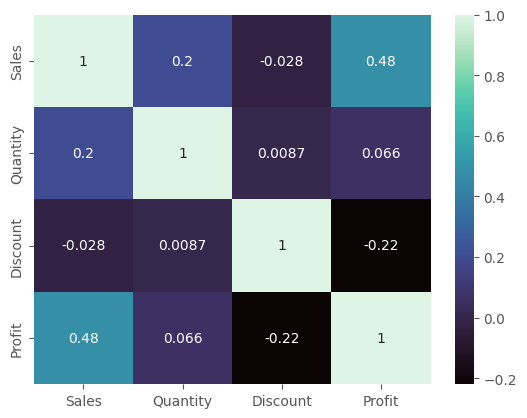

In [12]:
sns.heatmap(df_store[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap=sns.color_palette('mako', as_cmap=True))
plt.show()

#### Key Takeaway

* The **Profit** and **Sales** have a **POSITIVE** correlation. `R = 0.48`
* The **Sales** and **Quantity** have a **POSITIVE** correlation. `R = 0.2`
* The **Profit** and **Discount** have a **NEGATIVE** correlation. `R = -0.22`
* Everything else either have very weak correlation or no correlation with each other. `R ≈ 0`

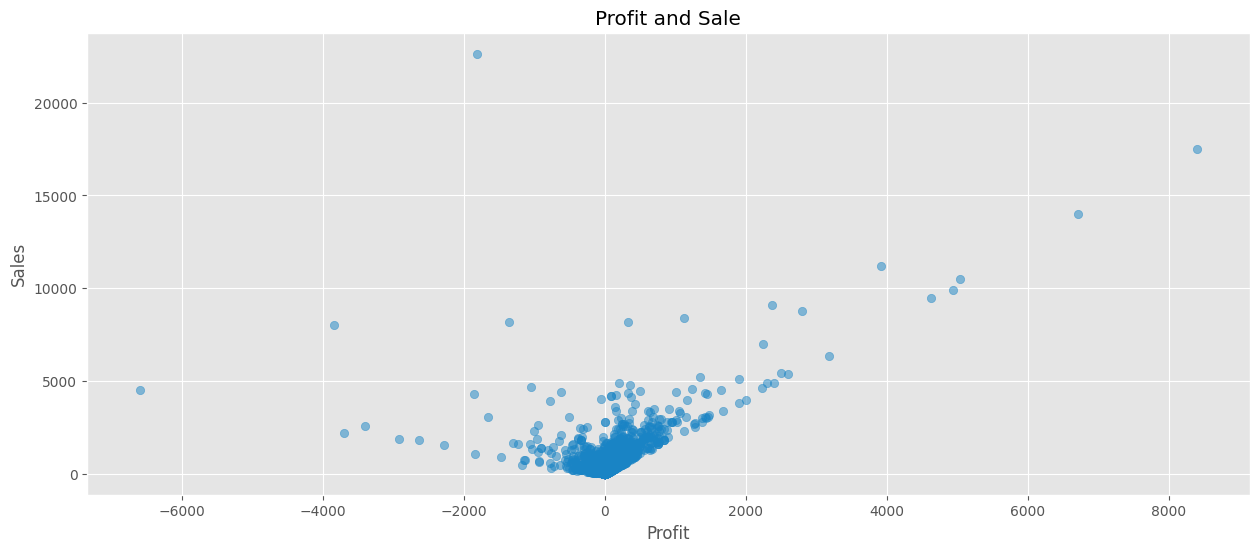

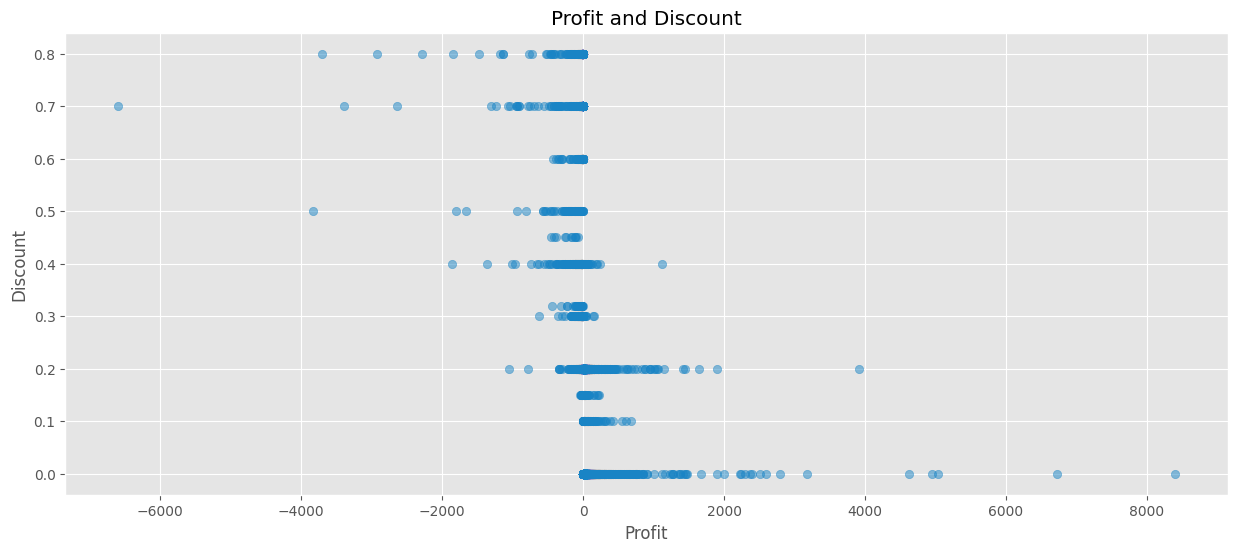

In [13]:
# Scatter plot Profit and Sales
plt.figure(figsize=(15,6))
plt.scatter(df_store['Profit'], df_store['Sales'], color='#1984c5', alpha=0.5)
plt.ylabel('Sales')
plt.xlabel('Profit')
plt.title('Profit and Sale')

# Scatter plot Profit and Discount
plt.figure(figsize=(15,6))
plt.scatter(df_store['Profit'], df_store['Discount'], color='#1984c5', alpha=0.5)
plt.ylabel('Discount')
plt.xlabel('Profit')
plt.title('Profit and Discount')

plt.show()

### Categorical Analysis

* Exploratory analysis for those with `object` data types.

#### Ship Mode

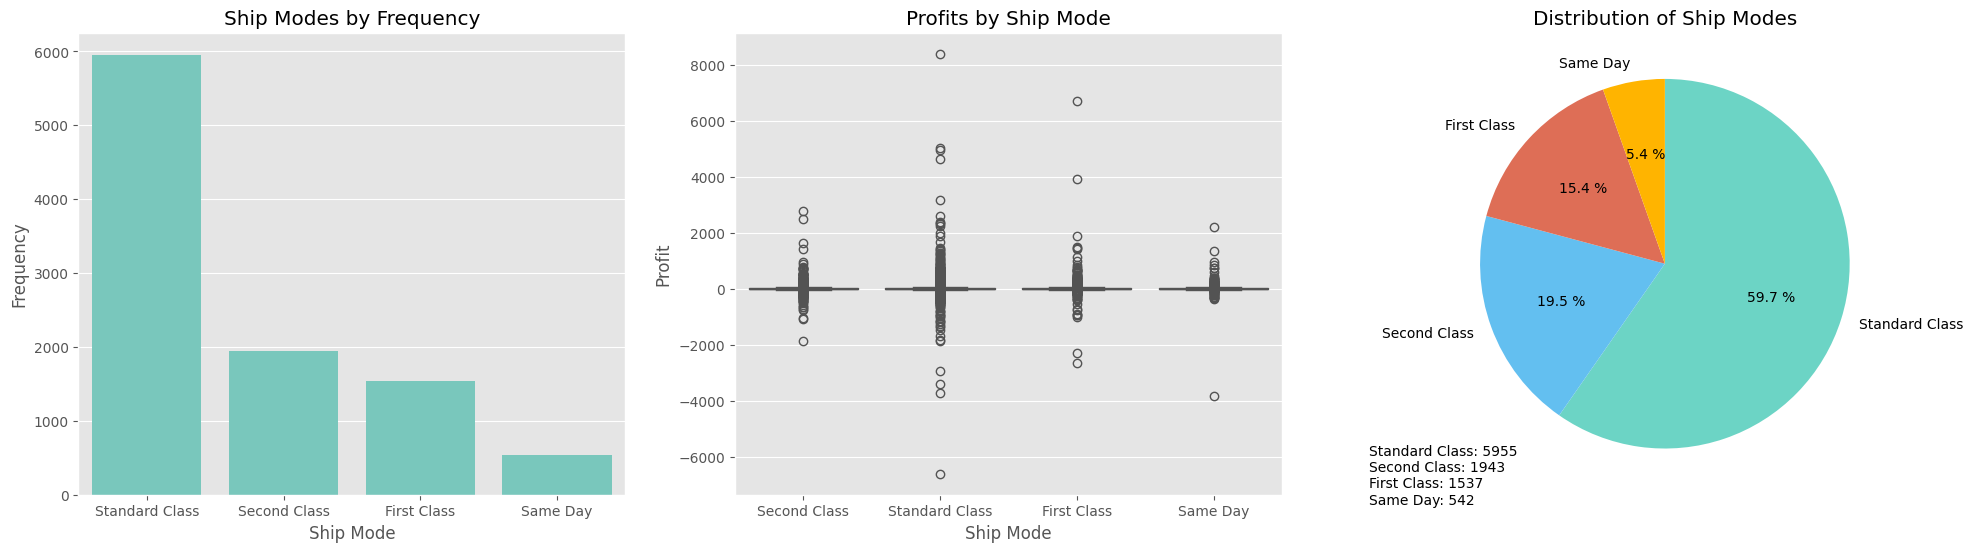

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
sm_count = df_store['Ship Mode'].value_counts()

# Barplot
ax1 = sns.barplot(sm_count, ax=ax1,  color='#6cd4c5')
ax1.set_title('Ship Modes by Frequency')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Ship Mode')

# Boxplot
ax2 = sns.boxplot(y=df_store['Profit'], x=df_store['Ship Mode'], ax=ax2)
ax2.set_title('Profits by Ship Mode')
ax2.set_xlabel('Ship Mode')

# Piechart
sm_colors = ['#6cd4c5', '#63bff0', '#de6e56', '#ffb400']
sm_labels = ['Standard Class', 'Second Class', 'First Class', 'Same Day']
plt.pie(sm_count, colors=sm_colors, labels=sm_labels, autopct='%.1f %%', startangle=90, counterclock=False)
plt.title('Distribution of Ship Modes')
plt.text(-1.6, -1.3, f'Standard Class: {sm_count.iloc[0]}\nSecond Class: {sm_count.iloc[1]}\nFirst Class: {sm_count.iloc[2]}\nSame Day: {sm_count.iloc[3]}', horizontalalignment='left')

plt.show()

#### Segment

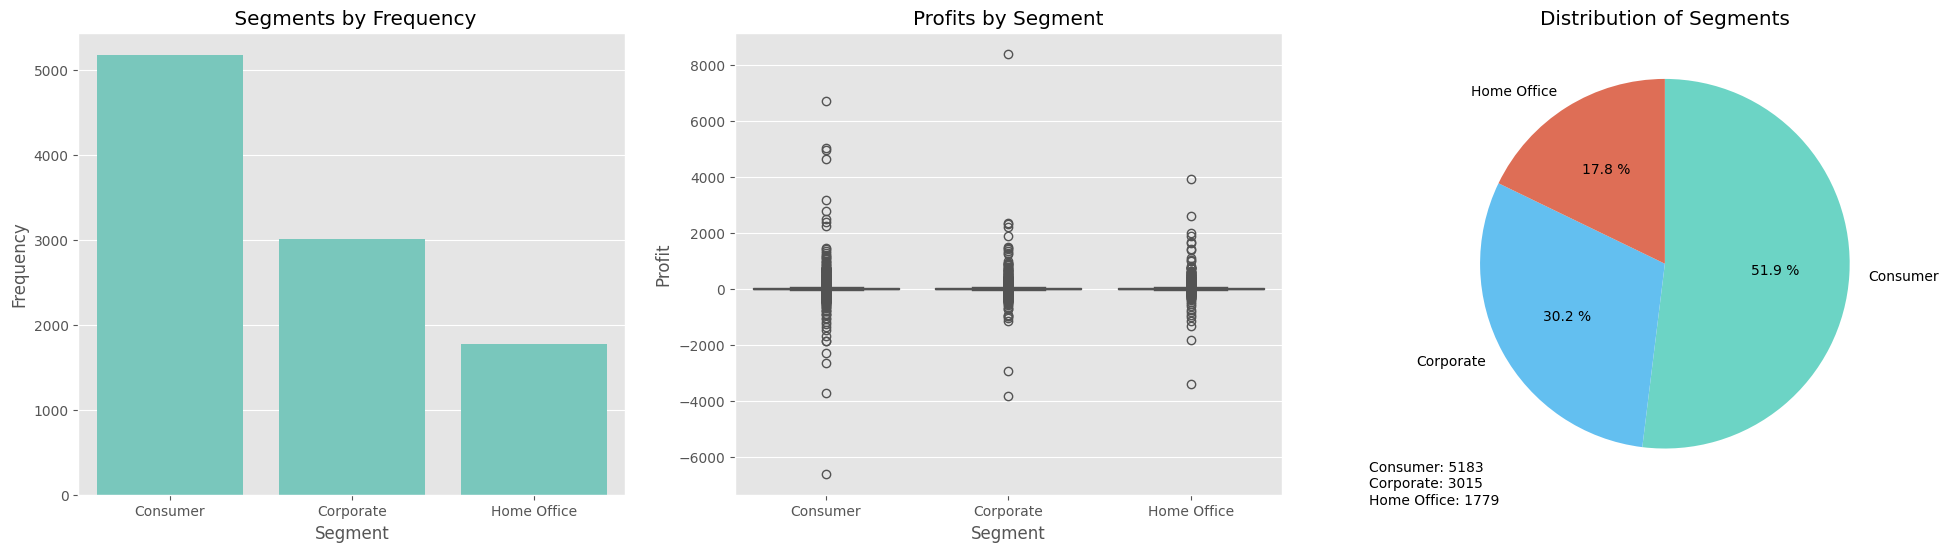

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
s_count = df_store['Segment'].value_counts()

# Barplot
ax1 = sns.barplot(s_count, ax=ax1,  color='#6cd4c5')
ax1.set_title(' Segments by Frequency')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Segment')

# Boxplot
ax2 = sns.boxplot(y=df_store['Profit'], x=df_store['Segment'], ax=ax2)
ax2.set_title('Profits by Segment')
ax2.set_xlabel('Segment')

# Piechart
s_colors = ['#6cd4c5', '#63bff0', '#de6e56']
s_labels = ['Consumer', 'Corporate', 'Home Office']
plt.pie(s_count, colors=s_colors, labels=s_labels, autopct='%.1f %%', startangle=90, counterclock=False)
plt.title('Distribution of Segments')
plt.text(-1.6, -1.3, f'Consumer: {s_count.iloc[0]}\nCorporate: {s_count.iloc[1]}\nHome Office: {s_count.iloc[2]}', horizontalalignment='left')

plt.show()

#### Region

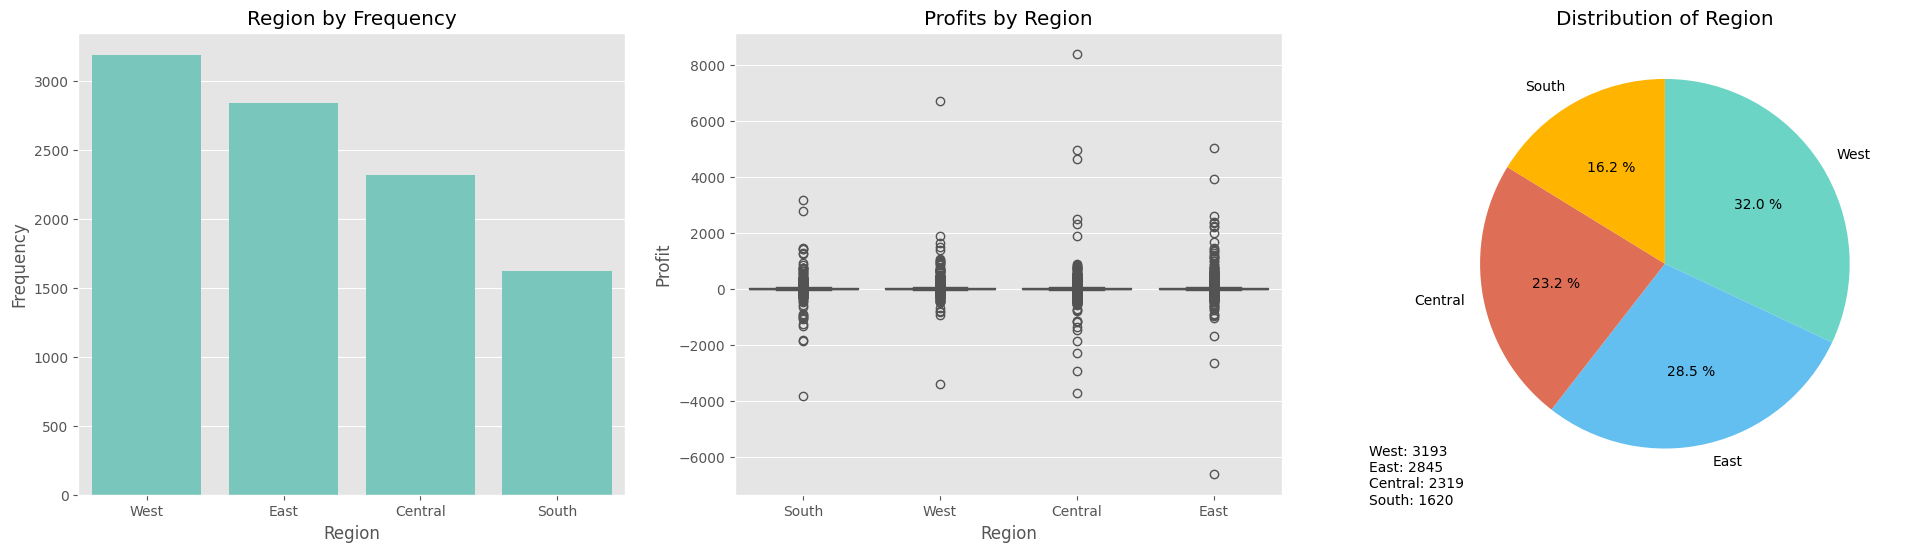

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
r_count = df_store['Region'].value_counts()

# Barplot
ax1 = sns.barplot(r_count, ax=ax1,  color='#6cd4c5')
ax1.set_title('Region by Frequency')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Region')

# Boxplot
ax2 = sns.boxplot(y=df_store['Profit'], x=df_store['Region'], ax=ax2)
ax2.set_title('Profits by Region')
ax2.set_xlabel('Region')

# Piechart
r_colors = ['#6cd4c5', '#63bff0', '#de6e56', '#ffb400']
r_labels = ['West', 'East', 'Central', 'South']
plt.pie(r_count, colors=r_colors, labels=r_labels, autopct='%.1f %%', startangle=90, counterclock=False)
plt.title('Distribution of Region')
plt.text(-1.6, -1.3, f'West: {r_count.iloc[0]}\nEast: {r_count.iloc[1]}\nCentral: {r_count.iloc[2]}\nSouth: {r_count.iloc[3]}', horizontalalignment='left')

plt.show()

#### State

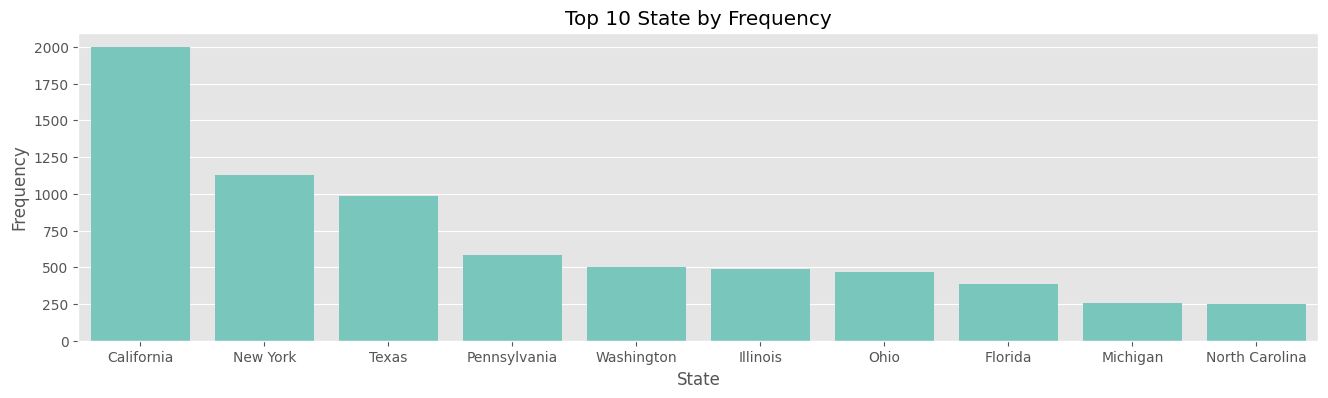

In [17]:
plt.figure(figsize=(16,4))
st_count = df_store['State'].value_counts().nlargest(10)

ax = sns.barplot(st_count, color='#6cd4c5')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 State by Frequency')

plt.show()

#### City

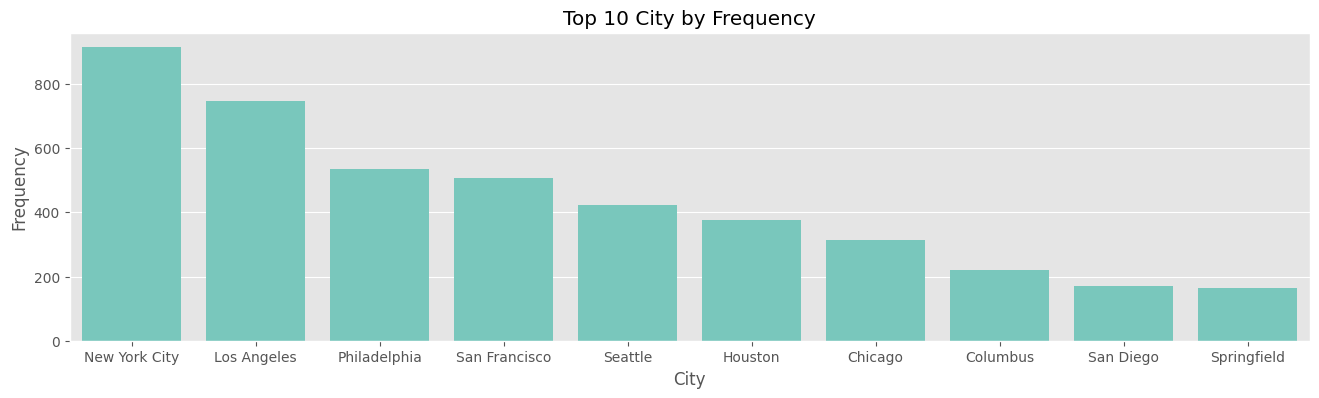

In [18]:
plt.figure(figsize=(16,4))
c_count = df_store['City'].value_counts().nlargest(10)

ax = sns.barplot(c_count, color='#6cd4c5')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 City by Frequency')

plt.show()

#### Category

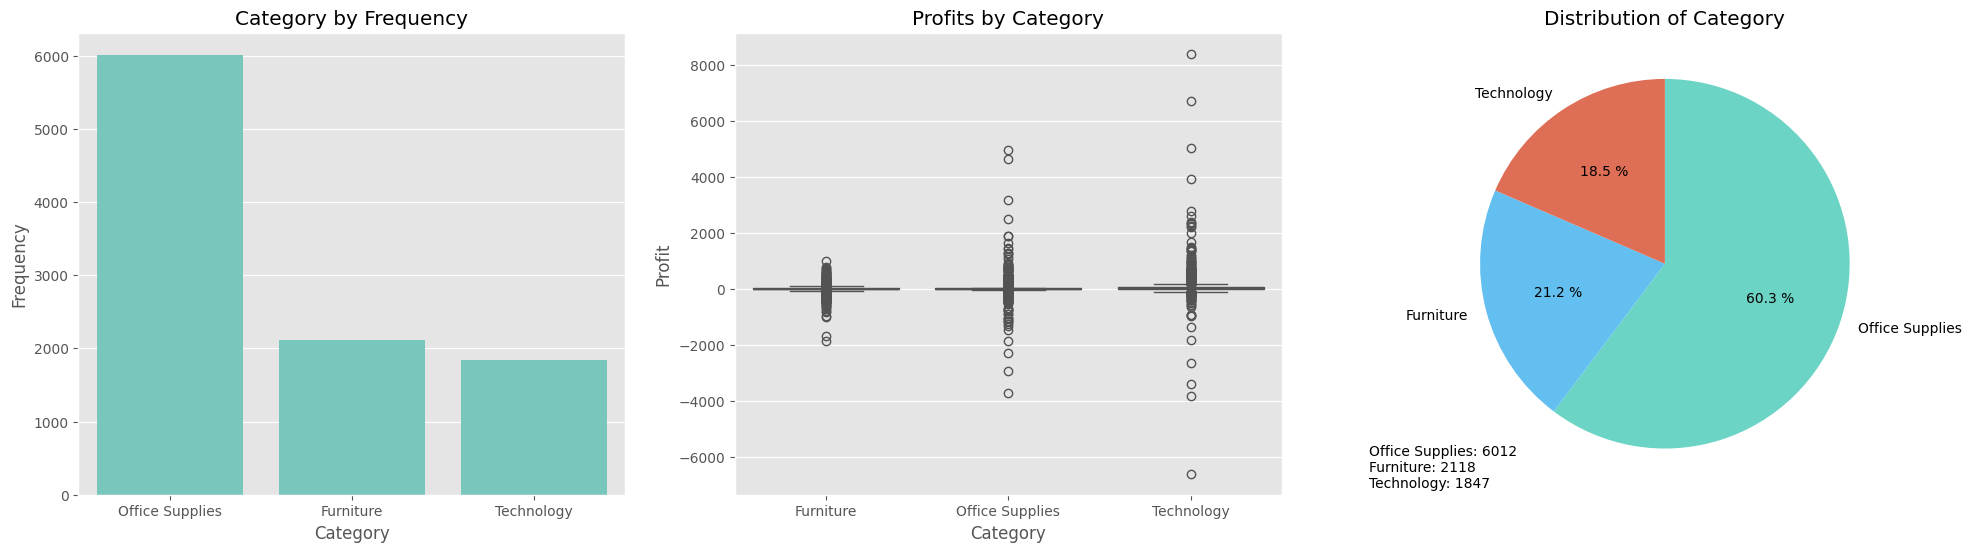

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
cg_count = df_store['Category'].value_counts()

# Barplot
ax1 = sns.barplot(cg_count, ax=ax1,  color='#6cd4c5')
ax1.set_title('Category by Frequency')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Category')

# Boxplot
ax2 = sns.boxplot(y=df_store['Profit'], x=df_store['Category'], ax=ax2)
ax2.set_title('Profits by Category')
ax2.set_xlabel('Category')

# Piechart
cg_colors = ['#6cd4c5', '#63bff0', '#de6e56']
cg_labels = ['Office Supplies', 'Furniture', 'Technology']
plt.pie(cg_count, colors=cg_colors, labels=cg_labels, autopct='%.1f %%', startangle=90, counterclock=False)
plt.title('Distribution of Category')
plt.text(-1.6, -1.3, f'Office Supplies: {cg_count.iloc[0]}\nFurniture: {cg_count.iloc[1]}\nTechnology: {cg_count.iloc[2]}\n', horizontalalignment='left')

plt.show()

#### Sub-Category

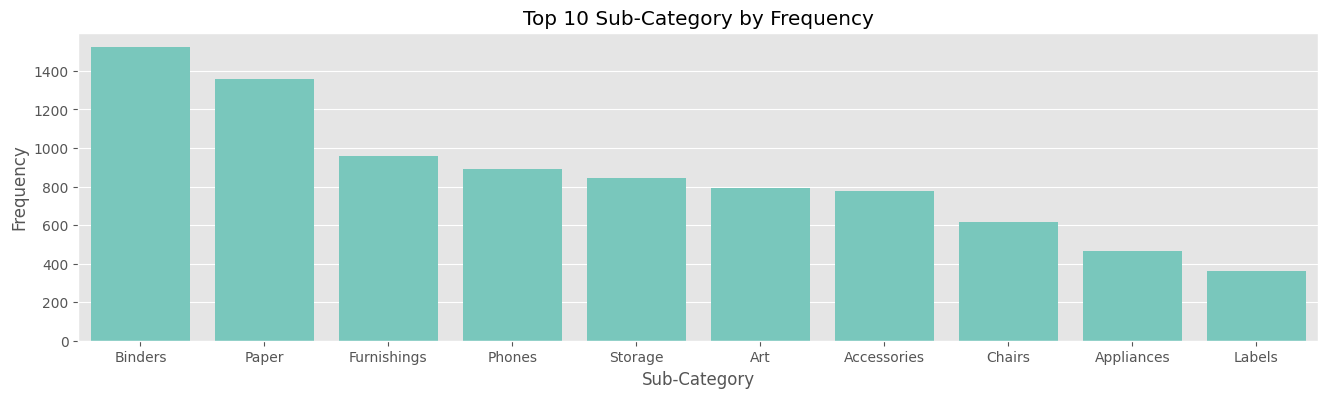

In [20]:
plt.figure(figsize=(16,4))
scg_count = df_store['Sub-Category'].value_counts().nlargest(10)

ax = sns.barplot(scg_count, color='#6cd4c5')
ax.set_ylabel('Frequency')
ax.set_title('Top 10 Sub-Category by Frequency')

plt.show()

### Numerical and Categorical Analysis

In [21]:
# Defining function for ploting

# Barplot + Piechart Combo
def plot(df, column1, column2, c):      # c for the color, input no. of rows after grouping
    colors = ['#6cd4c5', '#63bff0', '#de6e56', '#ffb400']
    
    df = df.groupby(by=f'{column1}')[f'{column2}'].sum().sort_values(ascending=False)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

    sns.barplot(df, color='#6cd4c5' , ax=ax1)
    ax1.set_xlabel(f'{column1}')

    plt.pie(df, colors=colors[:c], labels=df.index, startangle=90, counterclock=False, autopct='%.1f %%')
    plt.text(-2.8, -1.2, f'Total {column2}: {round(df.sum(), 2)}', horizontalalignment='left')

    plt.suptitle(f'{column2} by {column1}')
    plt.show()

# Top 10 Charts
def top(df, column1, column2, top):     # top = True if Top 10, False if Bot 10
    if top == True:
        df = df.groupby(by=f'{column1}')[f'{column2}'].sum().sort_values(ascending=False).nlargest(10)
        color = '#6cd4c5'
        x = 'Most'
    else:
        df = df.groupby(by=f'{column1}')[f'{column2}'].sum().sort_values(ascending=False).nsmallest(10)
        color = '#de6e56'
        x = 'Least'

    plt.figure(figsize=(16,4))
    sns.barplot(df, color=color)
    plt.title(f'{x} {column2} by {column1}')
    plt.show()

#### Profit/Sales/Quantity/Discount with Ship Mode

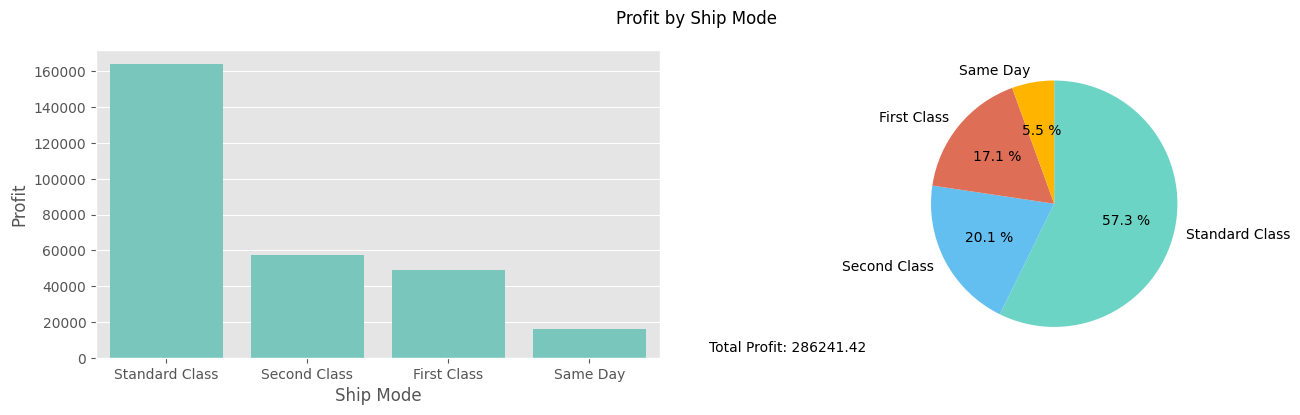

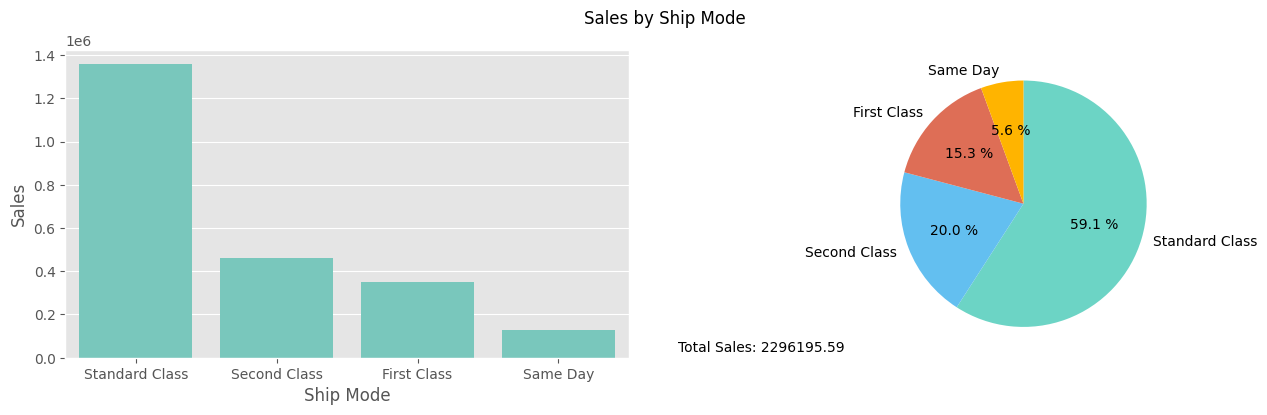

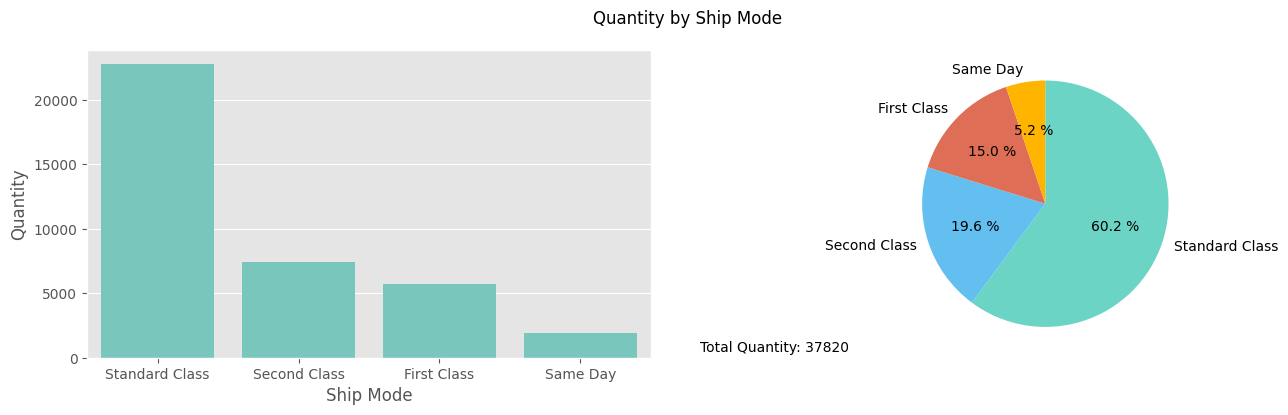

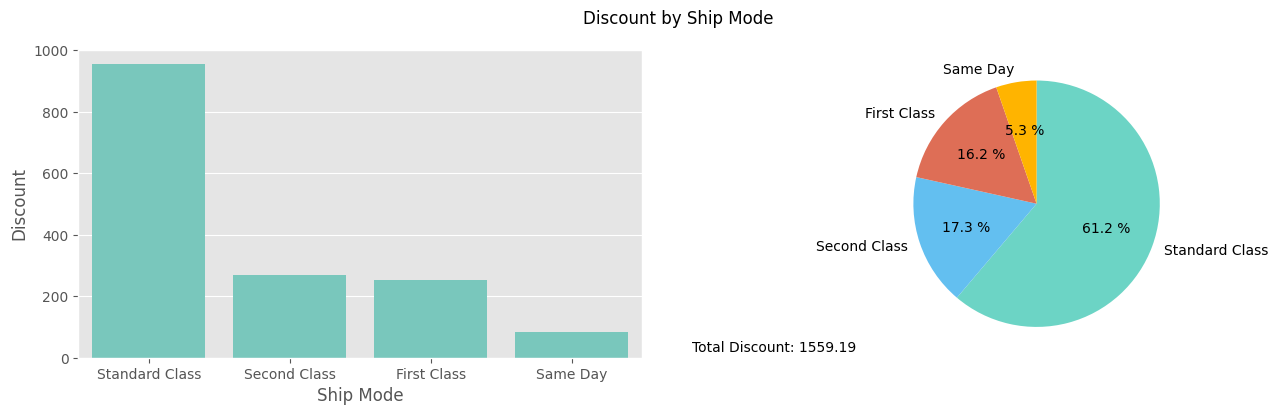

In [22]:
# Profit by Ship Mode
plot(df_store, 'Ship Mode', 'Profit', 4)

# Sales by Ship Mode
plot(df_store, 'Ship Mode', 'Sales', 4)

# Quantity by Ship Mode
plot(df_store, 'Ship Mode', 'Quantity', 4)

# Discount by Ship Mode
plot(df_store, 'Ship Mode', 'Discount', 4)

#### Profit/Sales/Quantity/Discount with Segment

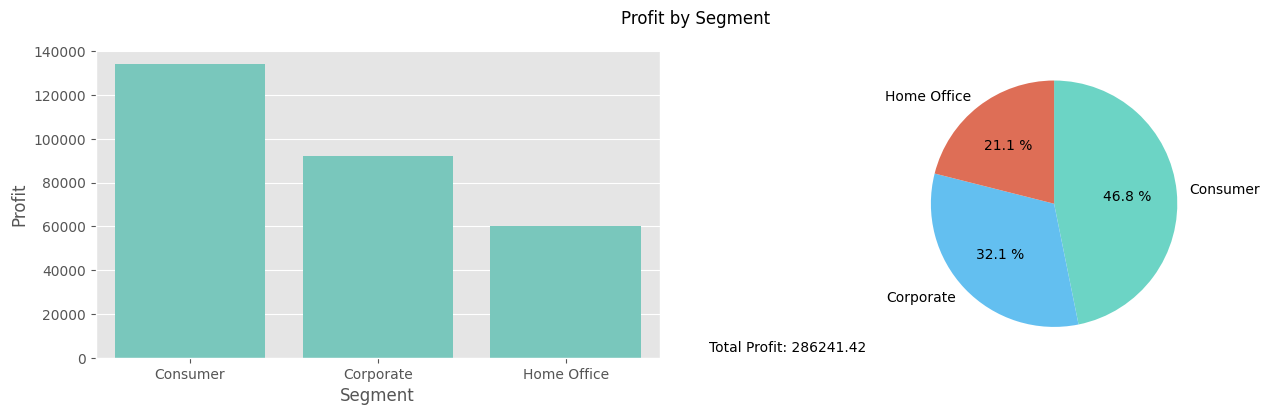

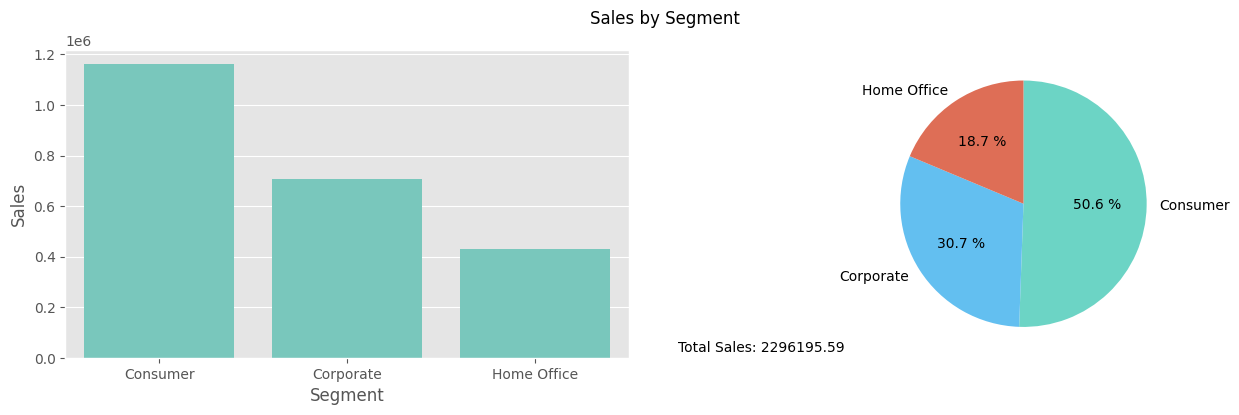

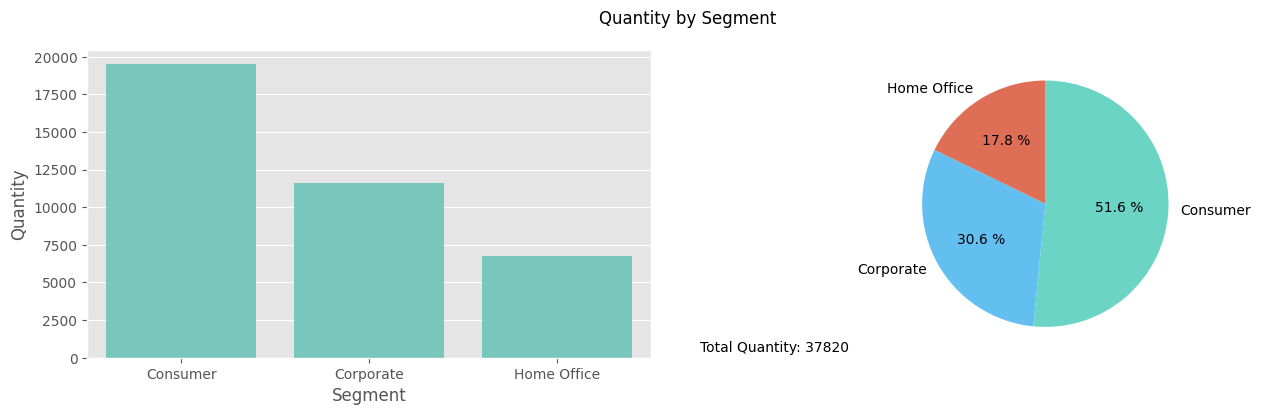

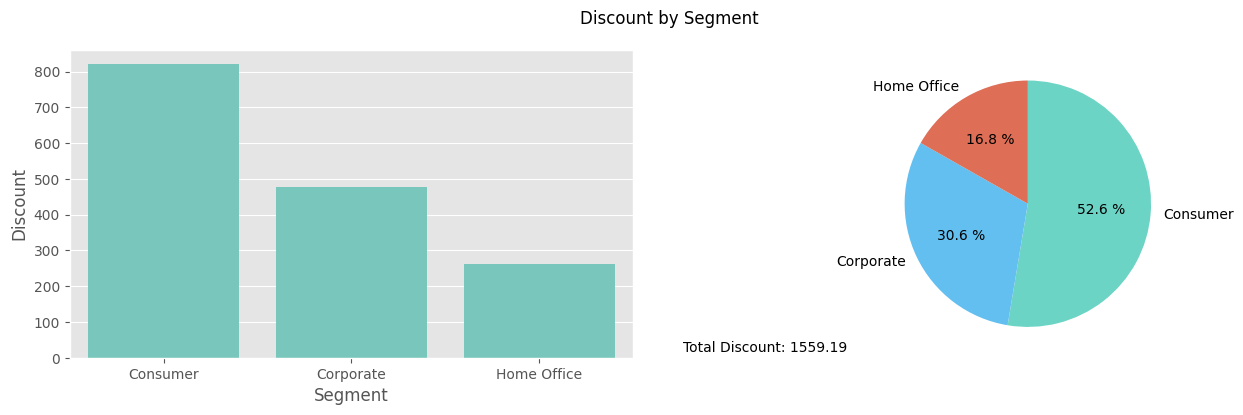

In [23]:
# Profit by Segment
plot(df_store, 'Segment', 'Profit', 3)

# Sales by Segment
plot(df_store, 'Segment', 'Sales', 3)

# Quantity by Segment
plot(df_store, 'Segment', 'Quantity', 3)

# Discount by Segment
plot(df_store, 'Segment', 'Discount', 3)

#### Profit/Sales/Quantity/Discount with Region

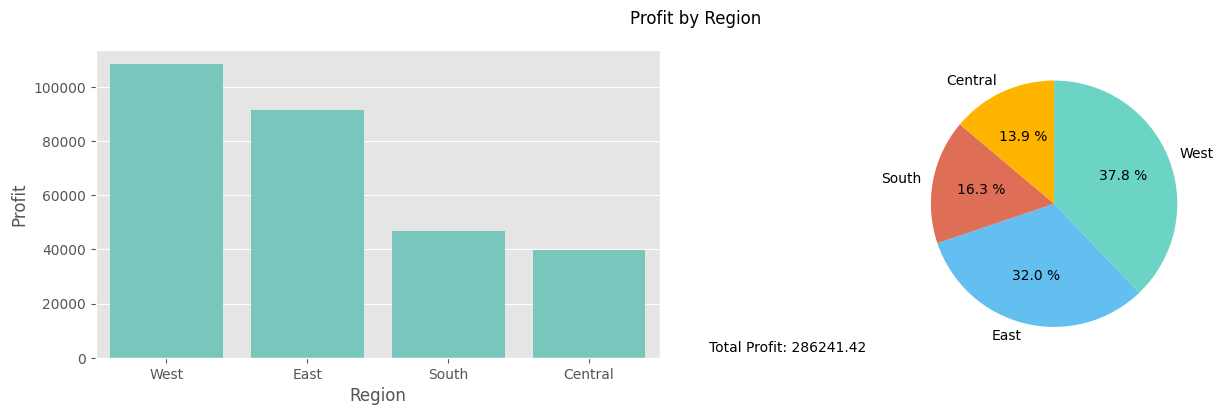

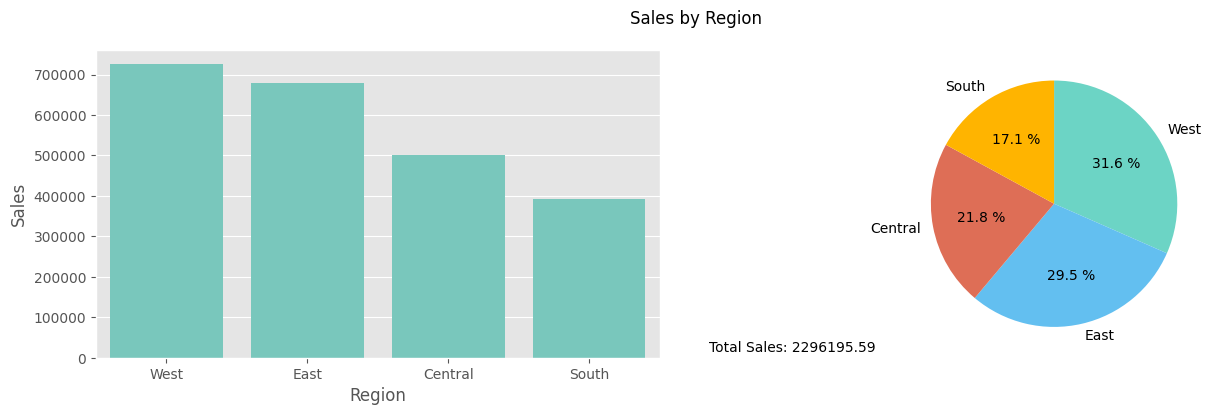

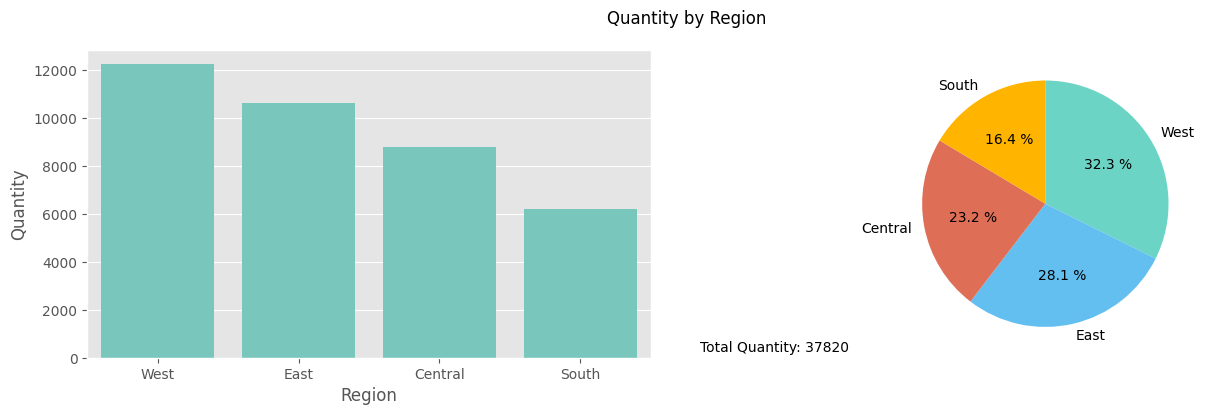

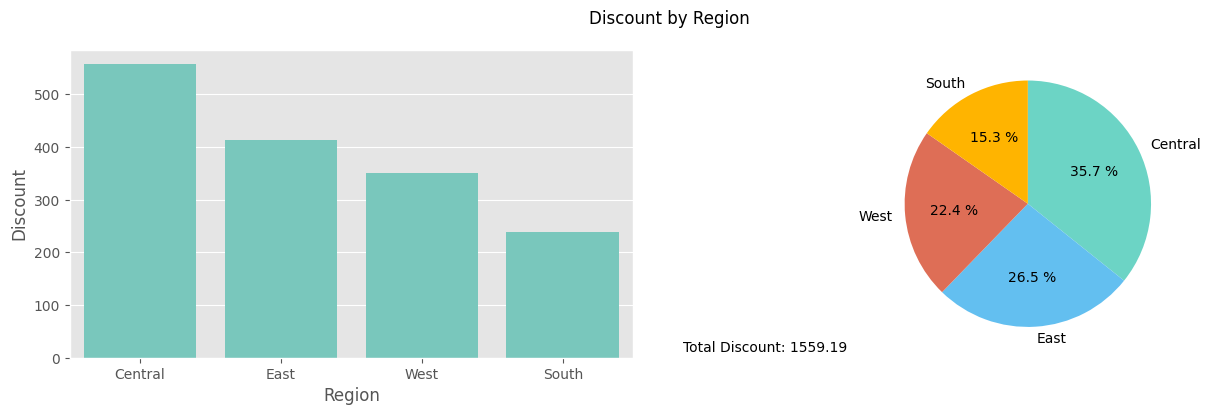

In [24]:
# Profit by Region
plot(df_store, 'Region', 'Profit', 4)

# Sales by Region
plot(df_store, 'Region', 'Sales', 4)

# Quantity by Region
plot(df_store, 'Region', 'Quantity', 4)

# Discount by Region
plot(df_store, 'Region', 'Discount', 4)

#### Profit/Sales/Quantity/Discount with State

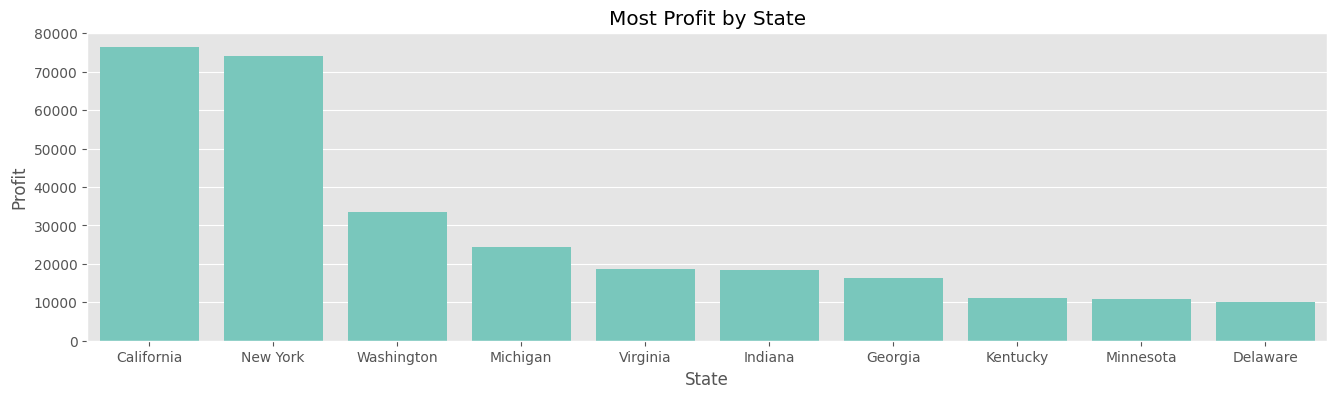

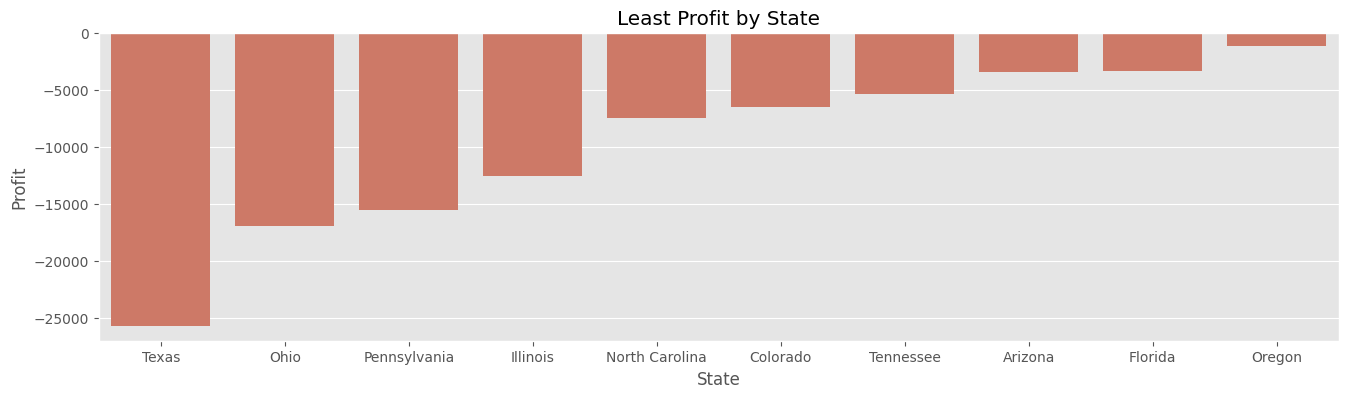

In [25]:
# Profit
top(df_store, 'State', 'Profit', True)
top(df_store, 'State', 'Profit', False)

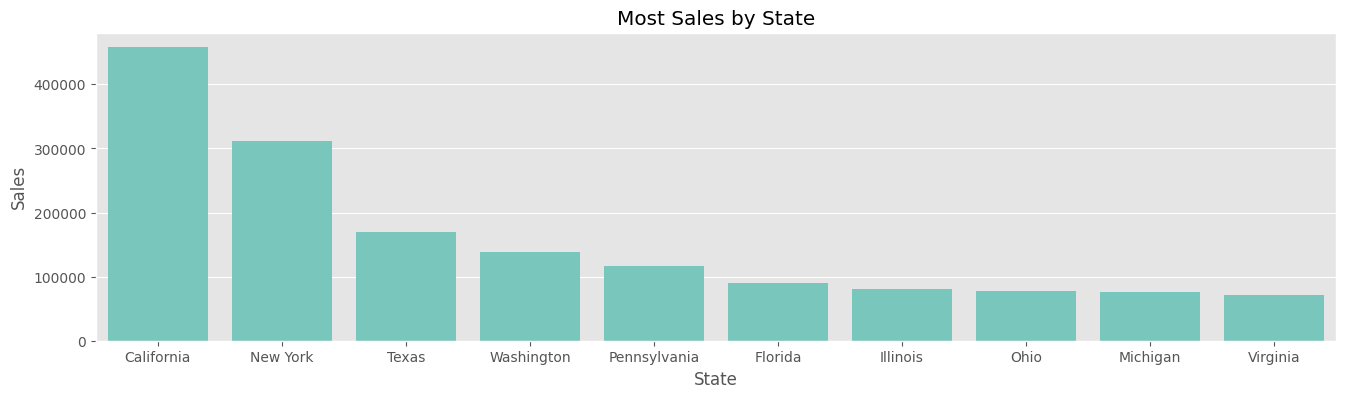

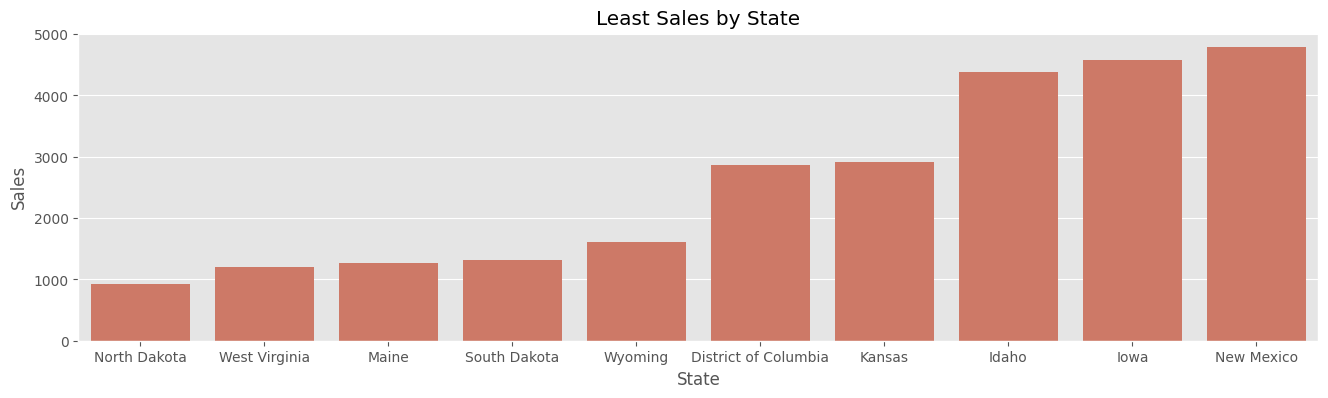

In [26]:
# Sales
top(df_store, 'State', 'Sales', True)
top(df_store, 'State', 'Sales', False)

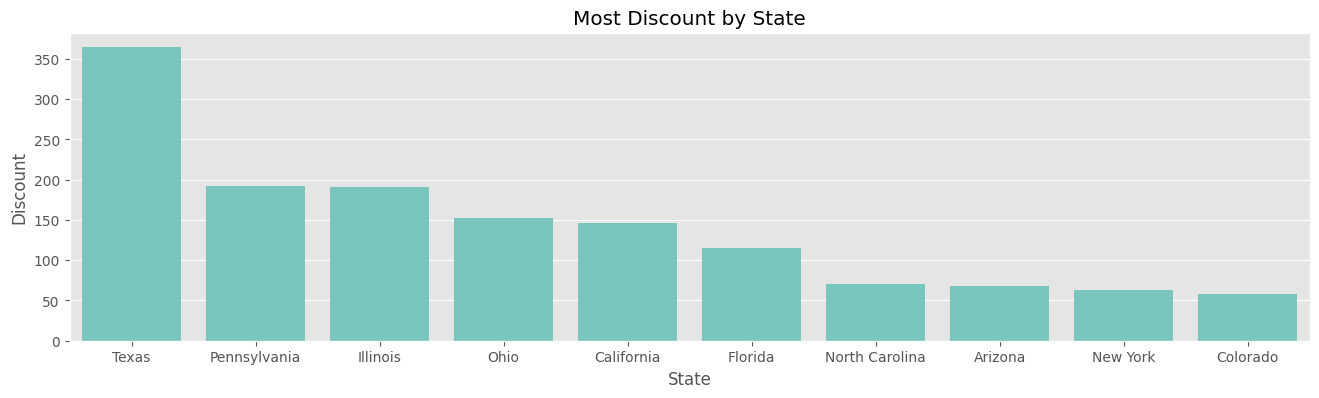

In [27]:
# Discount
top(df_store, 'State', 'Discount', True)

#### Profit/Sales/Quantity/Discount with City

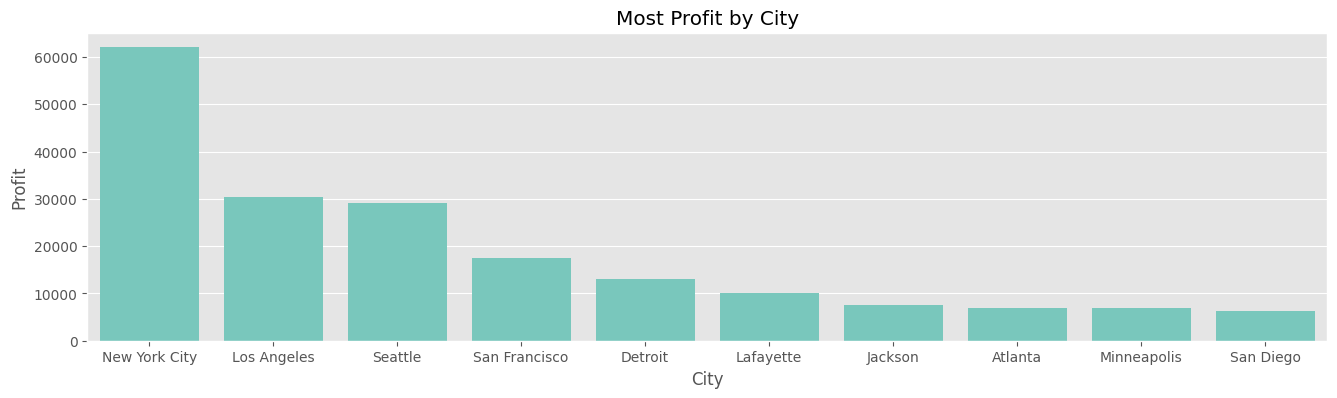

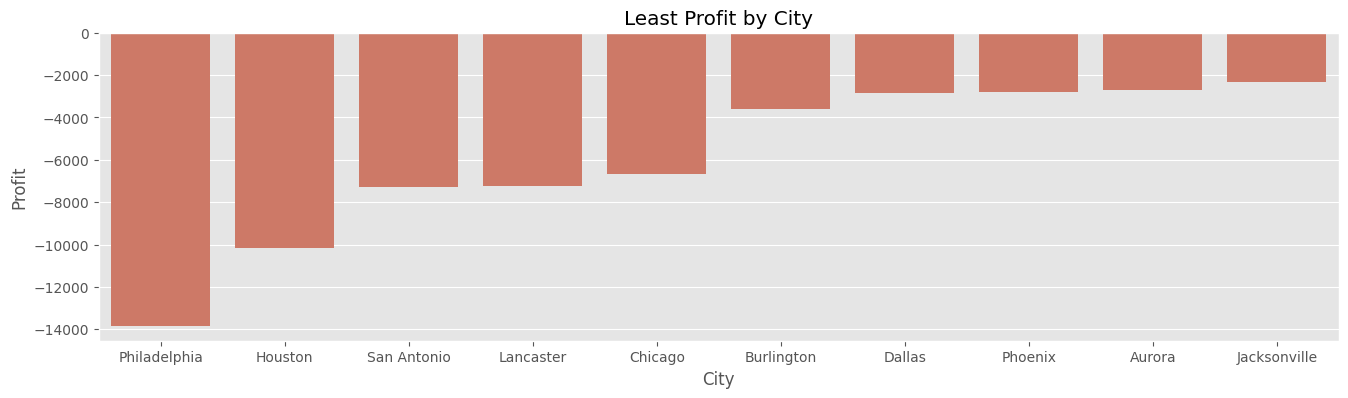

In [28]:
# Profit
top(df_store, 'City', 'Profit', True)
top(df_store, 'City', 'Profit', False)

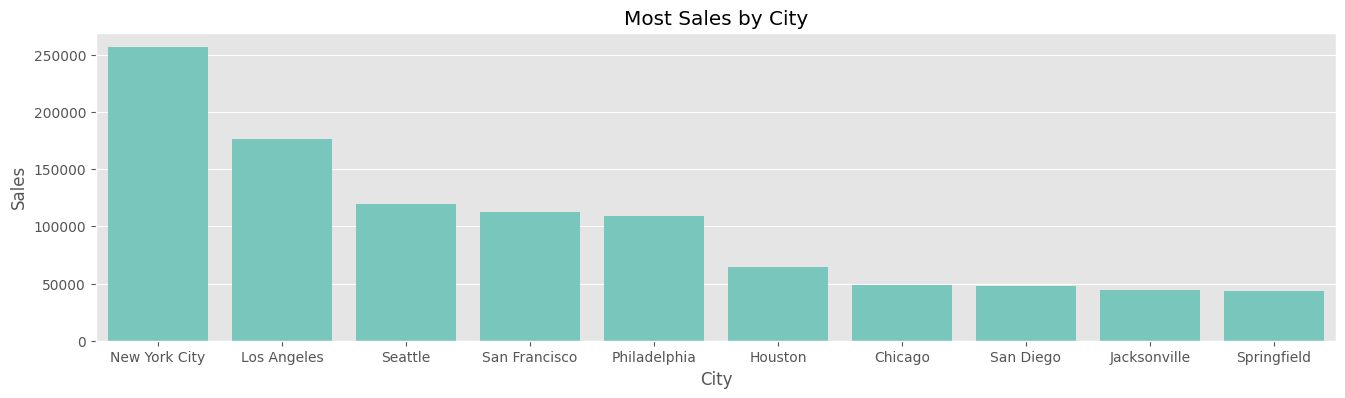

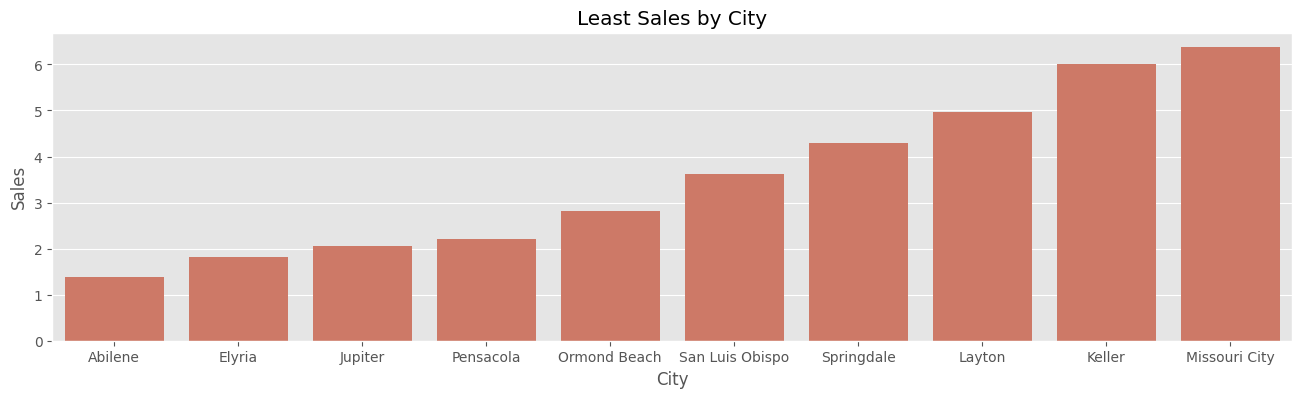

In [29]:
# Sales
top(df_store, 'City', 'Sales', True)
top(df_store, 'City', 'Sales', False)

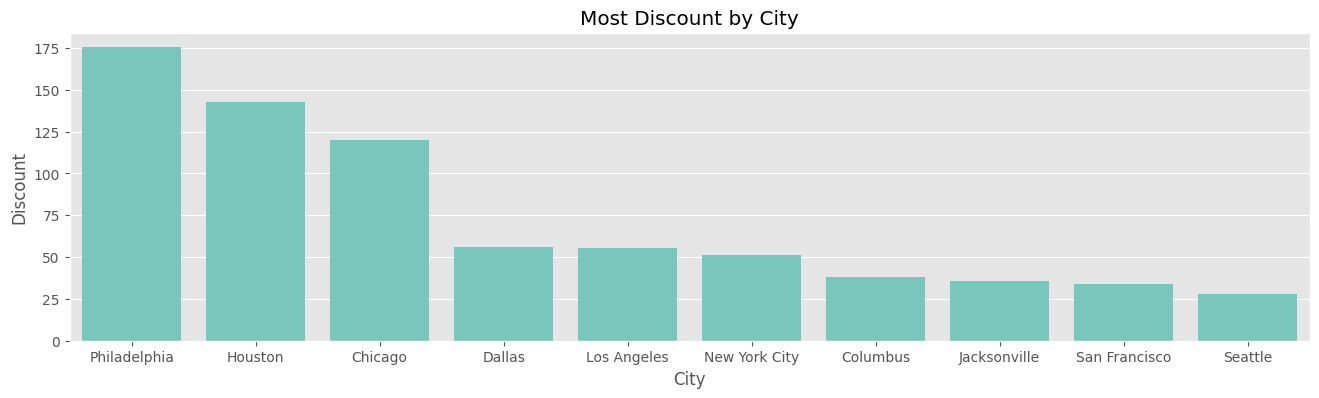

In [30]:
# Discount
top(df_store, 'City', 'Discount', True)

#### Profit/Sales/Quantity/Discount with Category

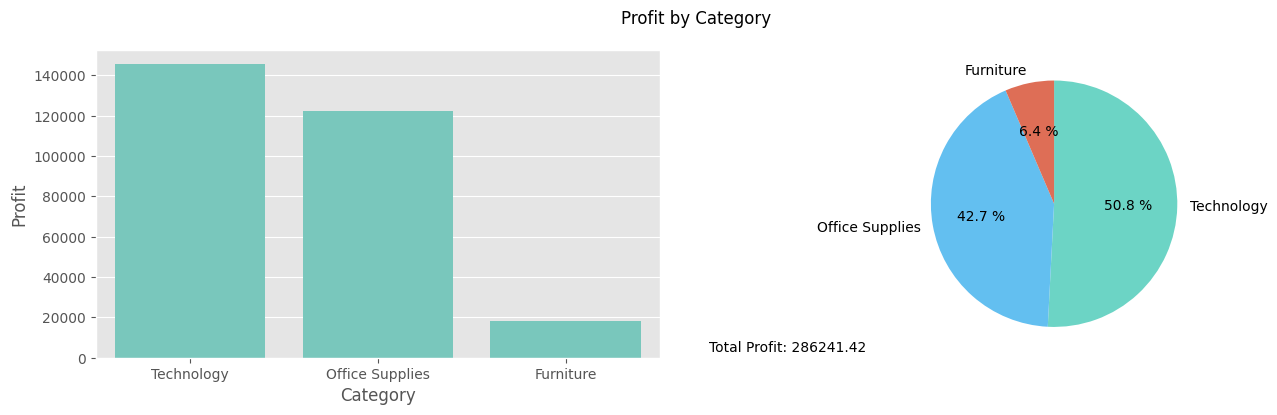

In [31]:
plot(df_store, 'Category', 'Profit', 3)

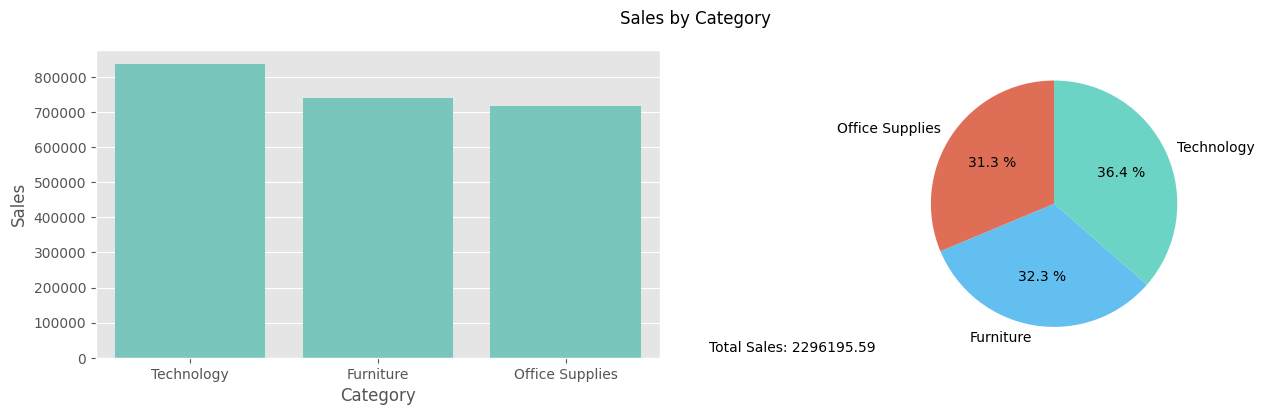

In [32]:
plot(df_store, 'Category', 'Sales', 3)

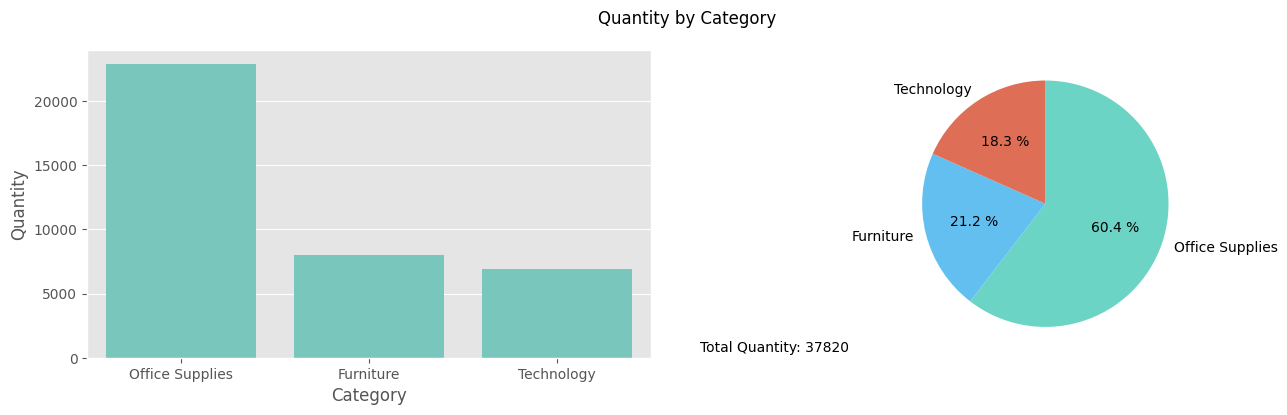

In [33]:
plot(df_store, 'Category', 'Quantity', 3)

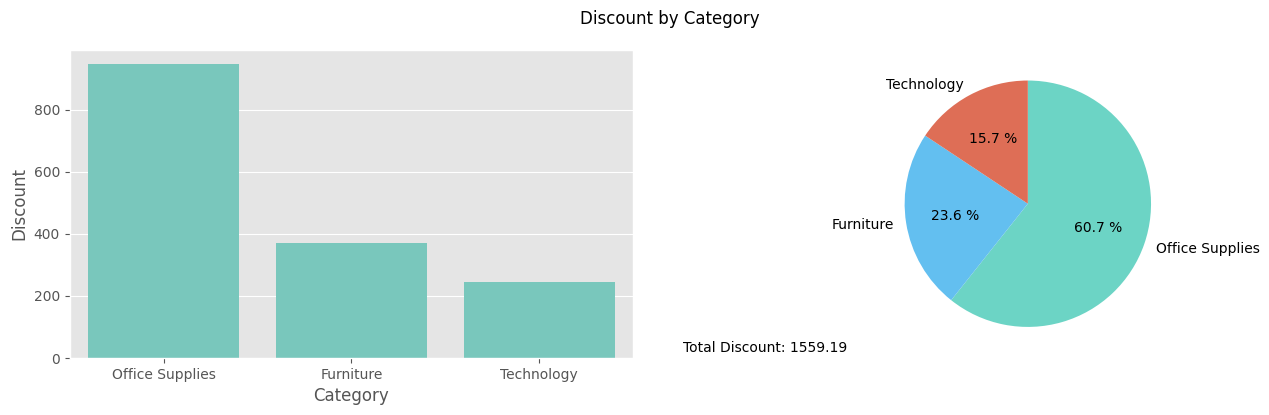

In [34]:
plot(df_store, 'Category', 'Discount', 3)

#### Profit/Sales/Quantity/Discount with Sub-Category

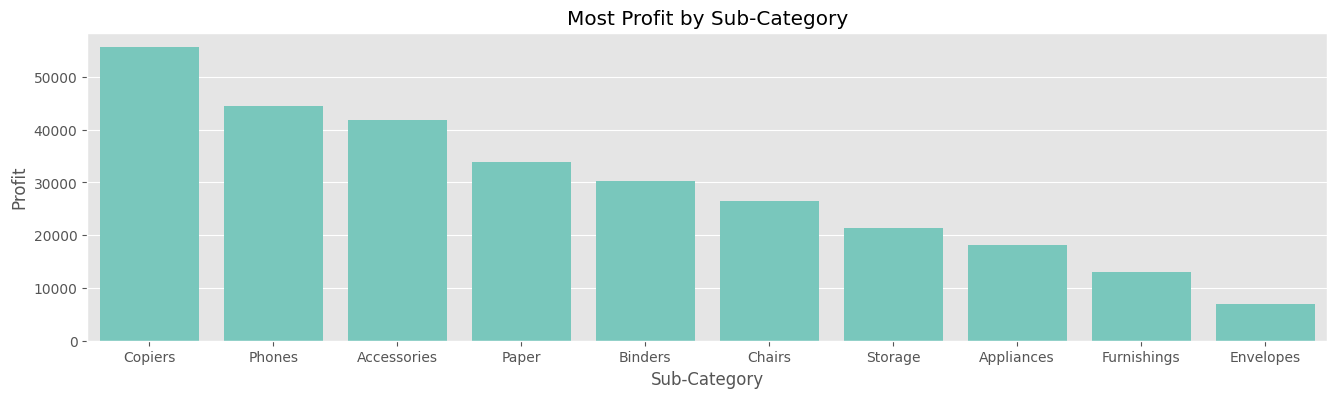

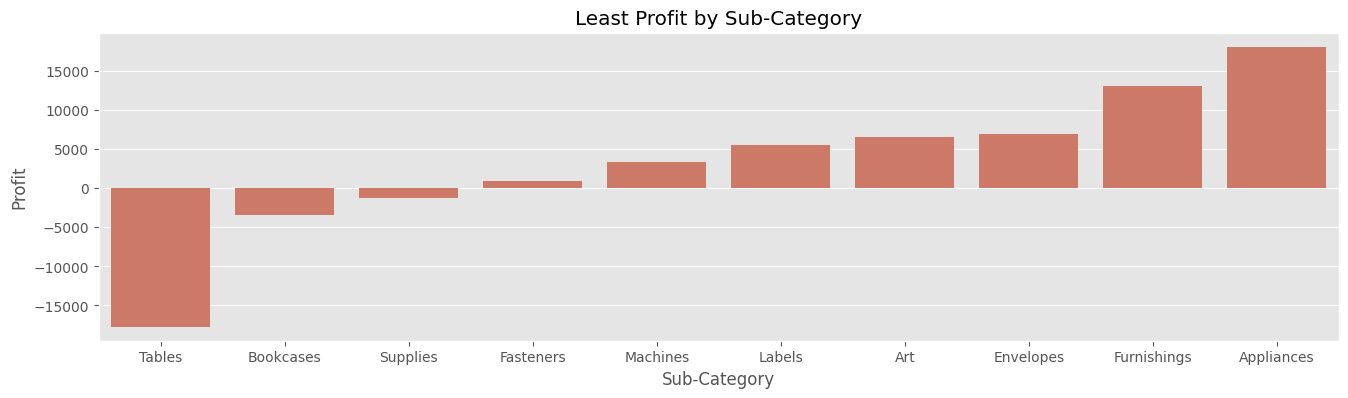

In [35]:
top(df_store, 'Sub-Category', 'Profit', True)
top(df_store, 'Sub-Category', 'Profit', False)

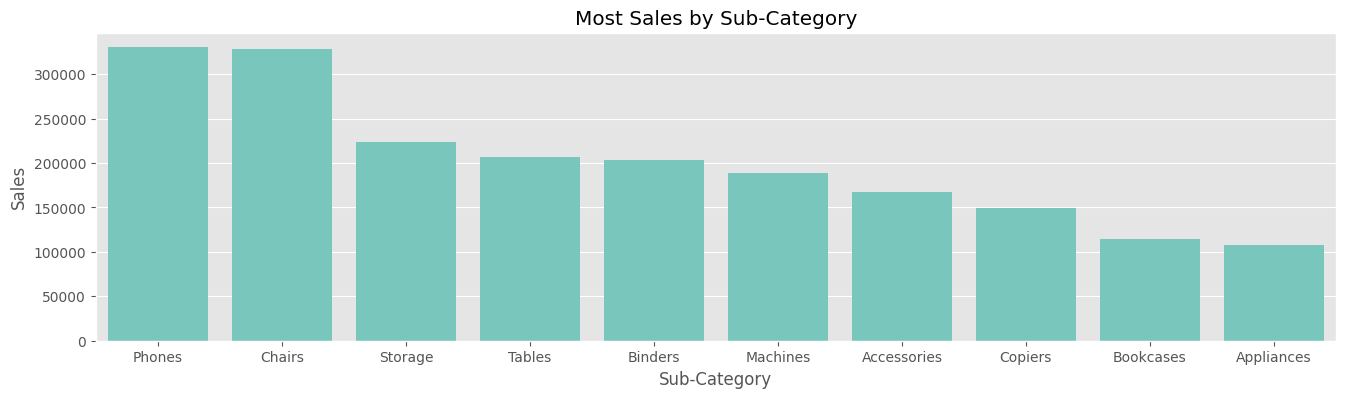

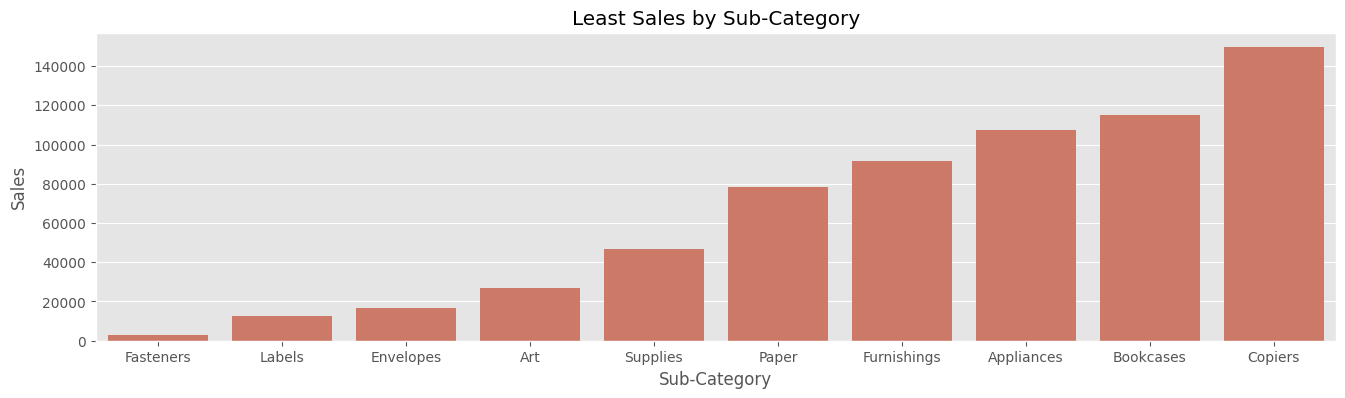

In [36]:
top(df_store, 'Sub-Category', 'Sales', True)
top(df_store, 'Sub-Category', 'Sales', False)

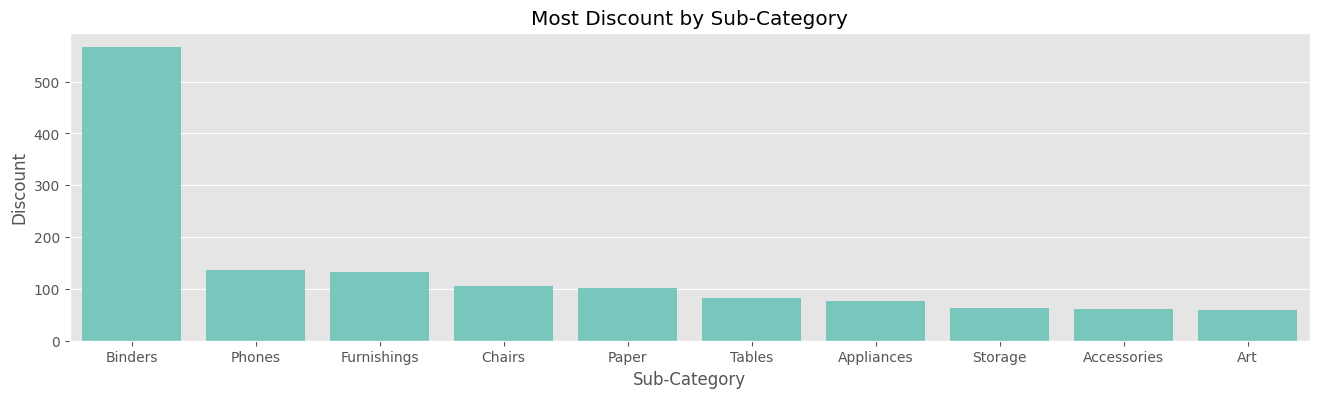

In [37]:
top(df_store, 'Sub-Category', 'Discount', True)

In [38]:
# Profit Margin Function
def profit_margin(column):
    profit = df_store.groupby(by=f'{column}')['Profit'].sum()
    sales = df_store.groupby(by=f'{column}')['Sales'].sum()
    print('Profit Margins')
    
    i = 0
    while i < profit.count():
        ratio = round((profit.iloc[i]/sales.iloc[i]) * 100, 2)
        print(f'{profit.index[i]}: {ratio}%')
        i += 1

## Step 4: Asking Question

* Formulate questions about the dataset
* Answer the questions

### Questions

1. What are the key trends in sales and profit in this data?
2. How do sales and profit compare across customer segments, and shipping modes?
3. How do sales and profit compare across different regions, states, and cities?
4. Which products or services are driving the most sales and profit, and which ones are underperforming?
5. Based on this analysis, what strategies or actions can be taken to increase sales and profit in the future?

### Insights


#### ***1. What are the key trends in sales and profit in this data?***

INPUT HERE THE TOTAL SALES AND PROFITS, 
LOCATIONS WITH HIGH DISCOUNT = LEAST PROFIT, DESPITE SALES.
TABLES LEAST PROFIT SUBCATEGORY
TECHNOLOGY MOST PROFITABLE CATEGORY

#### ***2. How do sales and profit compare across customer segments, and shipping modes?***

##### **Ship mode**

* **Standard Class** is the **most profitable** shipping mode, accounting for 57.3% of the total profit, followed by Second Class at 20.1% and First Class at 17.1%. **Same Day** shipping is the **least profitable**, contributing only 5.5% of the total profit.
* The same pattern goes for Sales with Standard Class having most sales and Same Day having the least.
* Customers exhibits a clear preference for Standard Class shipping over Same Day delivery.
* This preference is driven by cost-effectiveness, as customers are willing to wait longer for their orders to arrive, rather than paying additional expense for Same Day shipping.

##### **Segment**

* Our best customer segment is **Consumer**, contributing 46.8% of the total profit, followed by **Corporate** at 32.1%, and **Home Office** at the lowest with only 21.1% of the total profit.
* The same goes for Sales with Consumer having the most sales and Home Office having the least.
* Consumer segment is the most profitable, potentailly due to higher volume (5183) compared to Corporate (3015) and Home Office (1779).
* While the Consumer segment accounts for a larger share of sales, the Corporate and Home Office segments contributed relatively well to the profit.

In [39]:
# Profit Margin of Segment
profit_margin('Segment')

Profit Margins
Consumer: 11.54%
Corporate: 13.02%
Home Office: 14.04%


#### ***3. How do sales and profit compare across different regions, states, and cities?***

##### **Region**

* The **West region** is both the **most profitable** and has the **highest sales**, acounting for 37.8% of the total profit and 31.6% of the total sales.
* The **Central region** is the **least profitable**, contributing only 13.9% of total profit. This region also offers the **highest discount**.
* The high discount on Central may be a contributing factor in affecting its profitability.

##### **State**

* **Top 5 Most Profitable State**
    1. California
    2. New York
    3. Washington
    4. Michigan
    5. Virginia

* **Top 5 Least Profitable State**
    1. Texas
    2. Ohio
    3. Pennsylvania
    4. Illinois
    5. North Carolina

* The majority of states with the highest profitability are located in the East or West regions, while the Central and South regions have the states with the least profitability.
* California is the most profitable state. It also have the most sales.
* Texas is the least profitable state despite ranking 3rd in sales. Texas also have the highest discount, which may be a factor to its lower profitability.

##### **City**

* **Top 5 Most Profitable City**
    1. New York City
    2. Los Angeles
    3. Seattle
    4. San Francisco
    5. Detroit

* **Top 5 Least Profitable City**
    1. Philadelphia
    2. Houston
    3. San Antonio
    4. Lancaster
    5. Chicago

* The most profitable cities are located in the most profitable states, while the least profitable cities are located in the least profitable states.
* New York City is the most profitable city and has the highest sales volume.
* Philadelphia, despite ranking 5th in sales volume, is the least profitable city. Philadelphia also has the highest discount, which may contribute to its poor profitability.

#### ***4. Which products or services are driving the most sales and profit, and which ones are underperforming?***

##### **Category**

* The **Technology** category is the **most profitable**, accounting for 50.8% of the total profit, while **Furniture** is the **least profitable**, contributing only 6.4% to the total profit.
* Surprisingly, the Technology, Office Supplies, and Furniture categories have almost the same sales volumes. Despite this, Furniture ranks 2nd in sales volume but has the least profitability.
* The Office Supplies category has the highest quantity and discount. It's possible that discounts are offered for larger quantities of products purchased.

##### **Sub-Category**

* **Top 5 Most Profitable Sub-Category**
    1. Copiers
    2. Phones
    3. Accessories
    4. Paper
    5. Binders

* **Top 5 Least Profitable Sub-Category**
    1. Tables
    2. Bookcases
    3. Supplies
    4. Fasteners
    5. Machines

* Tables are the least profitable product, with a profit of `-$17,725.48`, which is `$14,252.93` less than the second least profitable product, Bookcases, at `-$3,472.56`.
* Tables may have a significant impact on why the Furniture category is the least profitable.
* On the other hand, the most profitable sub-categories consist of Technology and Office Supplies.

In [42]:
# For exporting
# df_store.to_csv('SampleSuperstoreTableau.csv', index=False)